In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load data

In [3]:
path = 'output_csv/fp_xgb_daily_pred_three_months_only.csv'
df = pd.read_csv(path)
# df = df.drop('Unnamed: 0', axis = 1)

In [4]:
df.head()

,player_name,game_id,game_date,reb,reb_pred,fanduel_salary,draftkings_salary,yahoo_salary,fanduel_position,draftkings_position,...,blk,blk_pred,tov,tov_pred,fp_fanduel,fp_fanduel_pred,fp_yahoo,fp_yahoo_pred,fp_draftkings,fp_draftkings_pred
0,AJ Green,22200620,2023-01-11,0,0.965221,3900.0,3000.0,10.0,SG,PG,...,0,0.012287,0,0.035665,3.0,5.256887,3.0,5.256887,3.00,5.290922
1,AJ Green,22200628,2023-01-12,3,3.653583,3800.0,3000.0,10.0,SG,PG,...,0,0.012361,0,0.035368,18.6,16.519955,18.6,16.519955,18.75,16.688419
2,AJ Green,22200641,2023-01-14,1,1.074851,3800.0,NaN,NaN,SG,NaN,...,0,0.012573,0,0.036974,10.2,11.031412,10.2,11.031412,10.25,11.071198
3,AJ Green,22200657,2023-01-16,0,0.580101,3800.0,3000.0,10.0,SG,PG,...,0,0.012704,0,0.036257,10.5,13.196696,10.5,13.196696,9.50,12.240360
4,AJ Green,22200695,2023-01-21,0,0.701000,3800.0,3200.0,10.0,SG,PG/SG,...,0,0.013043,0,0.039767,0.0,4.322295,0.0,4.322295,0.00,4.346031


In [5]:
df.columns

Index(['player_name', 'game_id', 'game_date', 'reb', 'reb_pred',
       'fanduel_salary', 'draftkings_salary', 'yahoo_salary',
       'fanduel_position', 'draftkings_position', 'yahoo_position', 'pts',
       'pts_pred', 'ast', 'ast_pred', 'stl', 'stl_pred', 'blk', 'blk_pred',
       'tov', 'tov_pred', 'fp_fanduel', 'fp_fanduel_pred', 'fp_yahoo',
       'fp_yahoo_pred', 'fp_draftkings', 'fp_draftkings_pred'],
      dtype='object')

# Summary statistics

In [6]:
df.describe()

,game_id,reb,reb_pred,fanduel_salary,draftkings_salary,yahoo_salary,pts,pts_pred,ast,ast_pred,...,blk,blk_pred,tov,tov_pred,fp_fanduel,fp_fanduel_pred,fp_yahoo,fp_yahoo_pred,fp_draftkings,fp_draftkings_pred
count,1.117300e+04,11173.000000,11173.000000,11150.000000,10935.000000,11114.000000,11173.000000,11173.000000,11173.000000,11173.000000,...,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000
mean,2.220089e+07,4.145350,3.731884,5524.225112,4977.823503,17.334623,11.100242,10.020760,2.473552,2.154720,...,0.439273,0.413119,1.245682,1.086960,21.952269,19.864747,21.952269,19.864747,21.789448,19.544243
std,1.567795e+02,3.412084,2.275865,1892.319277,2109.548098,10.100407,9.107455,6.338975,2.647365,1.870058,...,0.807460,0.680178,1.374041,0.999703,14.925764,10.733600,14.925764,10.733600,14.915829,10.454655
min,2.220062e+07,0.000000,-0.211872,410.000000,3000.000000,10.000000,0.000000,-0.658463,0.000000,-0.255192,...,0.000000,-0.091734,0.000000,-0.341575,-3.000000,-0.687870,-3.000000,-0.687870,-1.500000,0.096926
25%,2.220076e+07,2.000000,2.040936,4000.000000,3200.000000,10.000000,4.000000,5.454462,1.000000,0.802843,...,0.000000,0.011460,0.000000,0.052624,10.300000,11.987551,10.300000,11.987551,10.250000,11.896662
50%,2.220089e+07,3.000000,3.507739,5000.000000,4300.000000,12.000000,9.000000,9.466348,2.000000,1.821961,...,0.000000,0.012329,1.000000,1.008267,19.700000,19.018783,19.700000,19.018783,19.500000,18.754899
75%,2.220103e+07,6.000000,4.984182,6500.000000,6100.000000,22.000000,16.000000,13.385518,4.000000,3.079213,...,1.000000,0.982551,2.000000,1.745296,31.500000,26.850509,31.500000,26.850509,31.250000,26.119122
max,2.220116e+07,22.000000,14.906026,12500.000000,12800.000000,60.000000,71.000000,40.033226,20.000000,12.658790,...,9.000000,4.756878,10.000000,6.628754,85.400000,65.079108,85.400000,65.079108,87.500000,64.849846


<Figure size 1440x864 with 0 Axes>

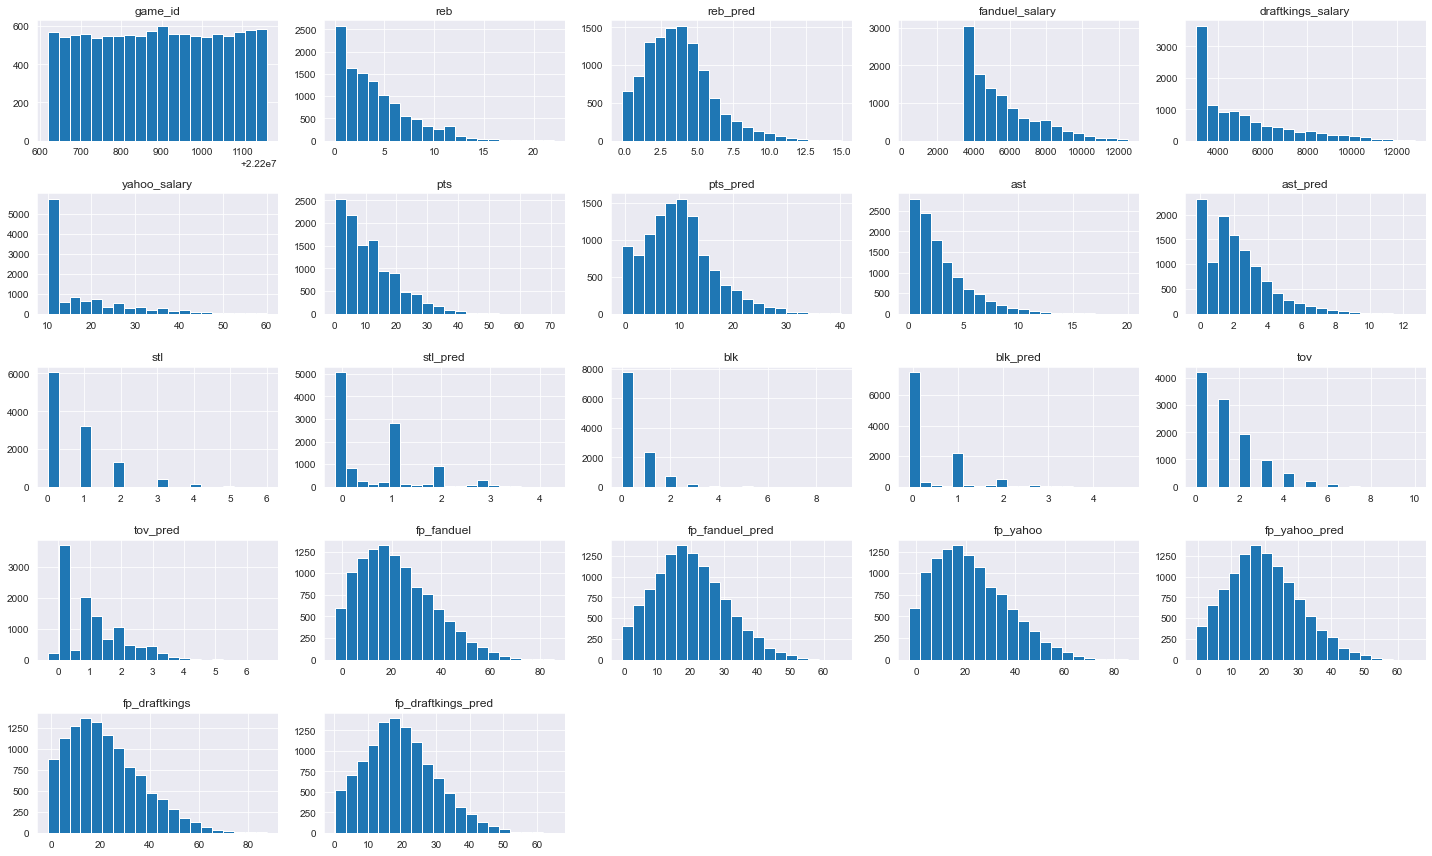

In [7]:
plt.figure(figsize=(20, 12))
df.hist(bins=20, figsize=(20, 12), layout=(5, 5))
plt.tight_layout()
plt.show()

In [8]:
stat_cols = ['reb', 'reb_pred',
       'pts', 'pts_pred', 'ast', 'ast_pred', 'stl',
       'stl_pred', 'blk', 'blk_pred', 'tov', 'tov_pred', 'fp_fanduel',
       'fp_fanduel_pred', 'fp_yahoo', 'fp_yahoo_pred', 'fp_draftkings',
       'fp_draftkings_pred']

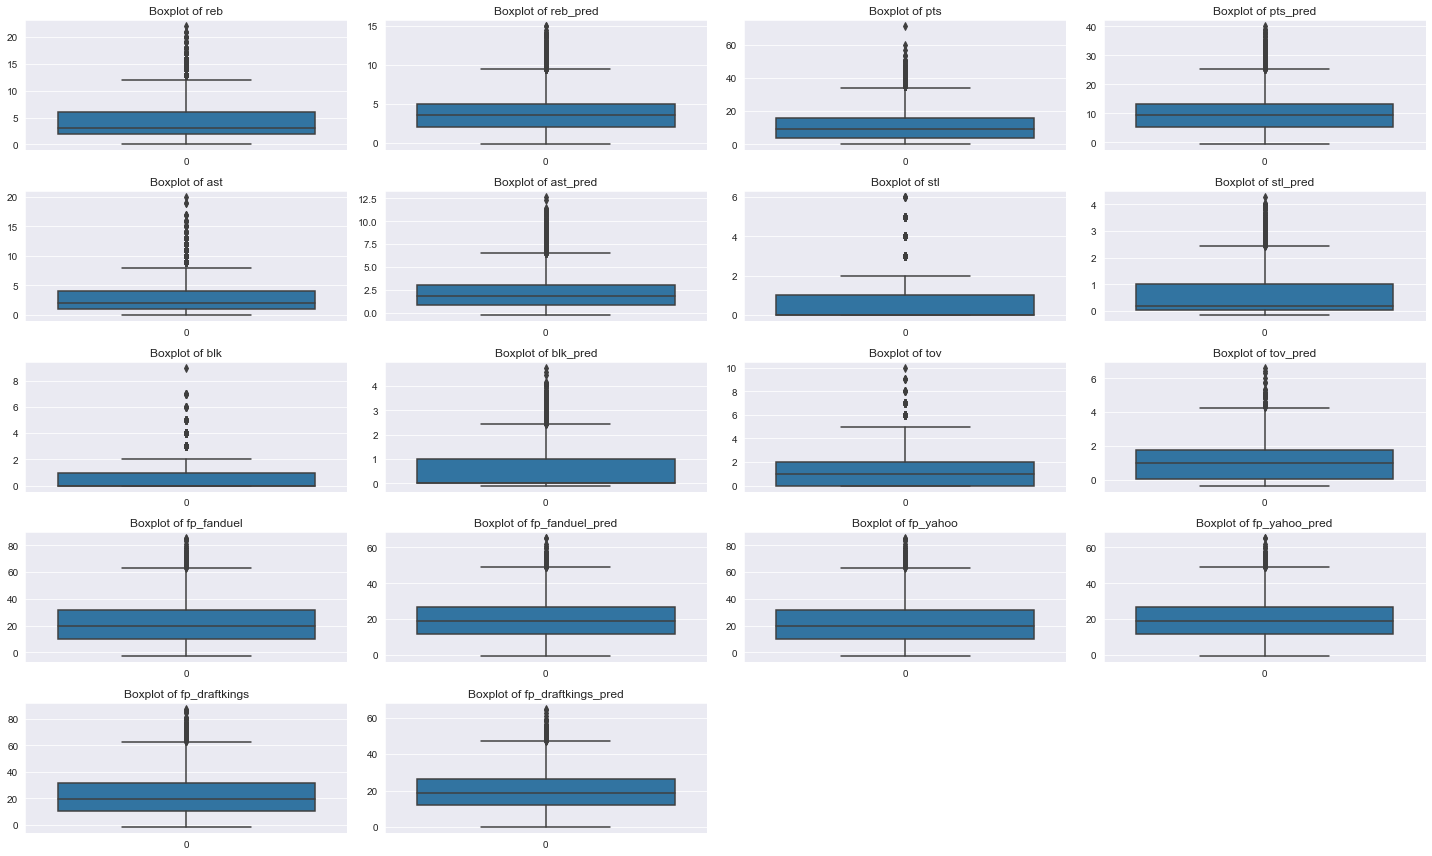

In [9]:
plt.figure(figsize=(20, 12))
for i, column in enumerate(stat_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


# Calcluate errors

In [10]:
# Calculate prediction errors
df['pts_error'] = abs(df['pts'] - df['pts_pred'])
df['reb_error'] = abs(df['reb'] - df['reb_pred'])
df['ast_error'] = abs(df['ast'] - df['ast_pred'])
df['stl_error'] = abs(df['stl'] - df['stl_pred'])
df['blk_error'] = abs(df['blk'] - df['blk_pred'])
df['tov_error'] = abs(df['tov'] - df['tov_pred'])
df['fp_fanduel_error'] = abs(df['fp_fanduel'] - df['fp_fanduel_pred'])
df['fp_yahoo_error'] = abs(df['fp_yahoo'] - df['fp_yahoo_pred'])
df['fp_draftkings_error'] = abs(df['fp_draftkings'] - df['fp_draftkings_pred'])

# Calculate percentage errors (avoid division by zero)
df['pts_pct_error'] = abs((df['pts'] - df['pts_pred']) / df['pts'].replace(0, 1))
df['reb_pct_error'] = abs((df['reb'] - df['reb_pred']) / df['reb'].replace(0, 1))
df['ast_pct_error'] = abs((df['ast'] - df['ast_pred']) / df['ast'].replace(0, 1))
df['stl_pct_error'] = abs((df['stl'] - df['stl_pred']) / df['stl'].replace(0, 1))
df['blk_pct_error'] = abs((df['blk'] - df['blk_pred']) / df['blk'].replace(0, 1))
df['tov_pct_error'] = abs((df['tov'] - df['tov_pred']) / df['tov'].replace(0, 1))
df['fp_fanduel_pct_error'] = abs((df['fp_fanduel'] - df['fp_fanduel_pred']) / df['fp_fanduel'].replace(0, 1))
df['fp_yahoo_pct_error'] = abs((df['fp_yahoo'] - df['fp_yahoo_pred']) / df['fp_yahoo'].replace(0, 1))
df['fp_draftkings_pct_error'] = abs((df['fp_draftkings'] - df['fp_draftkings_pred']) / df['fp_draftkings'].replace(0, 1))


# Top Players

In [11]:
from sklearn.metrics import mean_squared_error


df['game_date'] = pd.to_datetime(df['game_date'])

In [12]:
def calculate_mse_per_day(df, platform):
    mse_per_day = df.groupby('game_date').apply(
        lambda x: mean_squared_error(x[f'fp_{platform}'], x[f'fp_{platform}_pred'], squared=False)
    ).reset_index(name='RMSE')
    return mse_per_day


def create_kpi(df, platform, n=10):
    df[f'{platform}_positions'] = df[f'{platform}_position'].str.split('/')
    df_exploded = df.explode(f'{platform}_positions')
    df_exploded.sort_values(by=['game_date', f'{platform}_positions', f'{platform}_salary'], ascending=[True, True, False], inplace=True)

    df_top_players = df_exploded.groupby(['game_date', f'{platform}_positions']).apply(
        lambda x: x.head(n)
    ).reset_index(drop=True)
    
    mse_per_day = calculate_mse_per_day(df_top_players, platform)
    
    players_positions_per_date = df_top_players.groupby('game_date').apply(
    lambda x: list(zip(x['player_name'], x[f'{platform}_positions']))).reset_index(name='players_positions')

    mse_per_day_with_players_positions = mse_per_day.merge(players_positions_per_date, on='game_date', how='left')
    mse_per_day_with_players_positions['n_players'] = mse_per_day_with_players_positions['players_positions'].apply(lambda x: len(set(i[0] for i in x)))
    return mse_per_day_with_players_positions.set_index('game_date')

In [13]:
res  = {'fanduel': {'daily': create_kpi(df, 'fanduel')},
'yahoo': {'daily': create_kpi(df, 'yahoo')},
'draftkings': {'daily': create_kpi(df, 'draftkings')}}

/var/folders/tr/mh_38szj49lb1ggm801m67l00000gn/T/ipykernel_59209/3614017324.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_players = df_exploded.groupby(['game_date', f'{platform}_positions']).apply(
/var/folders/tr/mh_38szj49lb1ggm801m67l00000gn/T/ipykernel_59209/3614017324.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mse_per_day = df.groupby('game_date').apply(
/var/folders/tr/mh_38szj

In [22]:
res['fanduel']['daily']

,RMSE,players_positions,n_players
game_date,,,
2023-01-11,7.911295,"[(Nikola Jokic, C), (Julius Randle, C), (Doman...",31
2023-01-12,10.323053,"[(Joel Embiid, C), (Pascal Siakam, C), (Bam Ad...",34
2023-01-13,9.764935,"[(Julius Randle, C), (Domantas Sabonis, C), (K...",30
2023-01-14,7.550314,"[(Joel Embiid, C), (Pascal Siakam, C), (Bam Ad...",35
2023-01-15,8.678703,"[(Nikola Jokic, C), (Joel Embiid, C), (Domanta...",33
...,...,...,...
2023-03-27,10.424752,"[(Nikola Jokic, C), (Domantas Sabonis, C), (Ni...",37
2023-03-28,11.328860,"[(Kristaps Porzingis, C), (Jaren Jackson Jr., ...",32
2023-03-29,10.921637,"[(Joel Embiid, C), (Anthony Davis, C), (Domant...",35


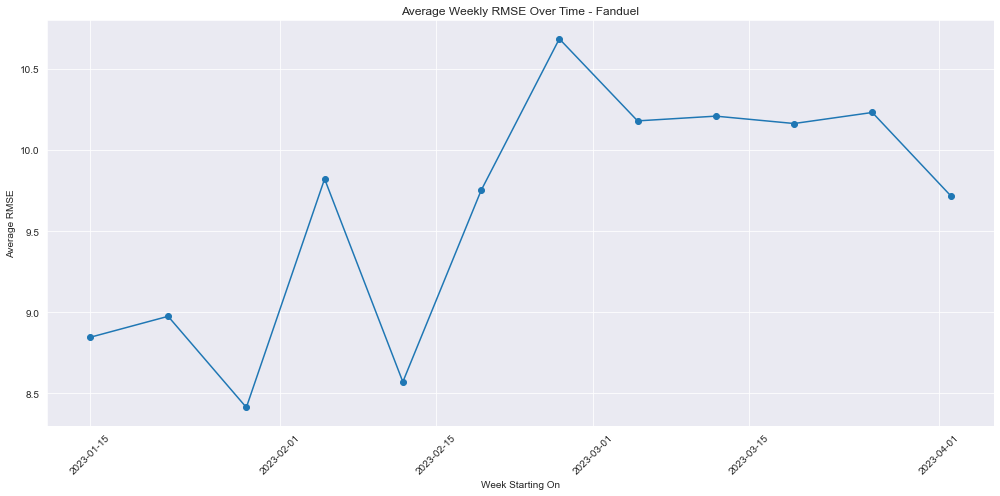

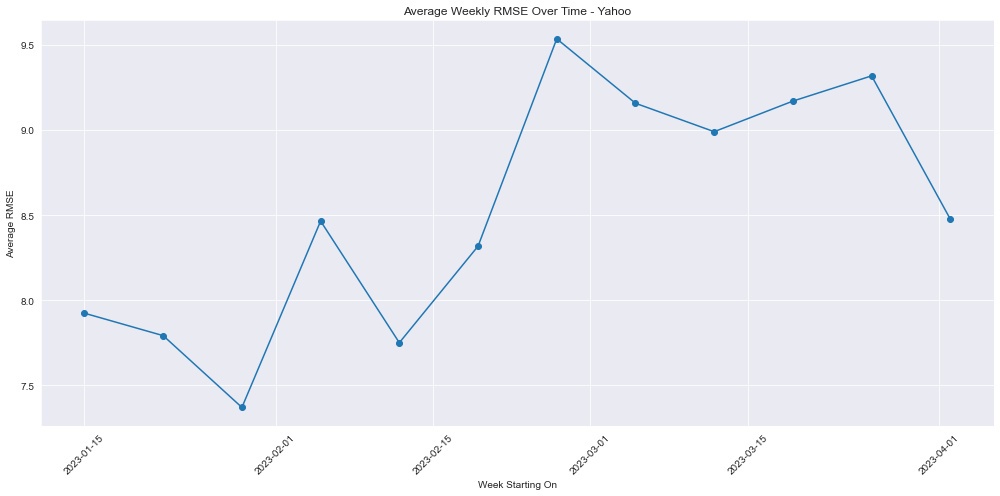

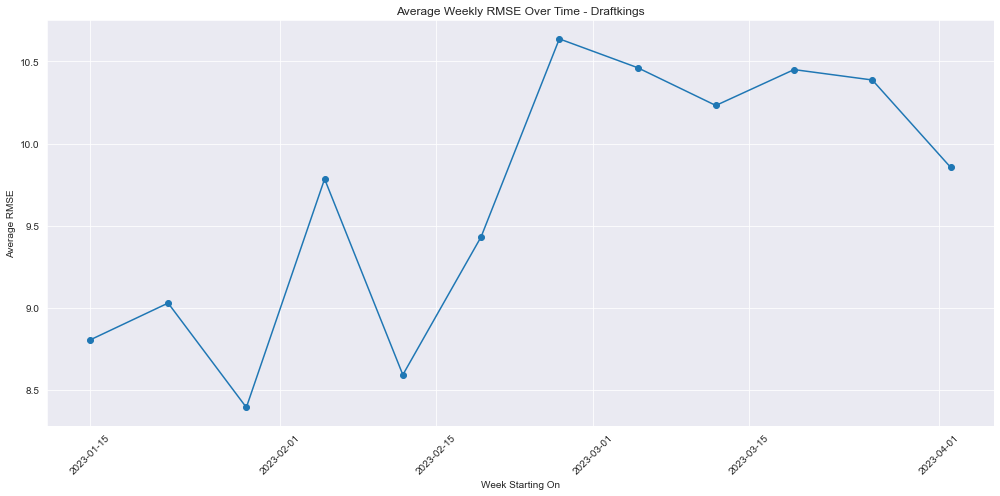

In [14]:
for plat in res.keys():
    weekly_rmse = res[plat]['daily']['RMSE'].resample('W').mean().reset_index()
    weekly_rmse.columns = ['week_starting_on', 'average_RMSE']
    
    res[plat].update({'weekly': weekly_rmse})
    plt.figure(figsize=(14, 7))
    plt.plot(weekly_rmse['week_starting_on'], weekly_rmse['average_RMSE'], marker='o')
    plt.title(f'Average Weekly RMSE Over Time - {plat.title()}')
    plt.xlabel('Week Starting On')
    plt.ylabel('Average RMSE')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    

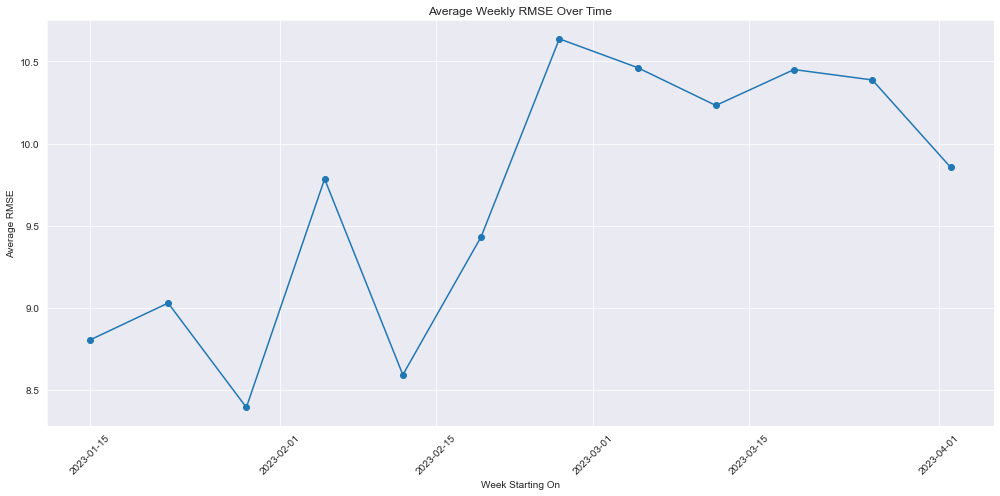

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(weekly_rmse['week_starting_on'], weekly_rmse['average_RMSE'], marker='o')
plt.title('Average Weekly RMSE Over Time')
plt.xlabel('Week Starting On')
plt.ylabel('Average RMSE')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Group by team

In [17]:
team_errors = df.groupby('team').mean()[[
    'pts_error', 'reb_error', 'ast_error', 'stl_error', 'blk_error', 'to_error',
    'fp_fanduel_error', 'fp_yahoo_error', 'fp_draftkings_error',
    'pts_pct_error', 'reb_pct_error', 'ast_pct_error', 'stl_pct_error', 'blk_pct_error', 'to_pct_error',
    'fp_fanduel_pct_error', 'fp_yahoo_pct_error', 'fp_draftkings_pct_error'
]]

KeyError: 'team'

In [18]:
team_errors_sorted = team_errors.sort_values(by='fp_fanduel_error')
team_errors_sorted

NameError: name 'team_errors' is not defined

In [19]:
plt.figure(figsize=(14, 8))
team_errors_sorted[['fp_fanduel_error', 'fp_yahoo_error', 'fp_draftkings_error']].plot(kind='bar')
plt.title('Mean Absolute Prediction Errors by Team')
plt.xlabel('Team')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.legend(title='Fantasy Platform')
plt.show()

# Plot mean percentage errors by team
plt.figure(figsize=(14, 8))
team_errors_sorted[['fp_fanduel_pct_error', 'fp_yahoo_pct_error', 'fp_draftkings_pct_error']].plot(kind='bar')
plt.title('Mean Percentage Prediction Errors by Team')
plt.xlabel('Team')
plt.ylabel('Mean Percentage Error')
plt.xticks(rotation=45)
plt.legend(title='Fantasy Platform')
plt.show()

NameError: name 'team_errors_sorted' is not defined

<Figure size 1008x576 with 0 Axes>

## Group by position

## Group by perforamnce

In [18]:
df['pts_cluster'] = pd.cut(df['pts'], bins=[-float('inf'), 5, 10, 20, float('inf')],
                           labels=['<5', '5-10', '10-20', '>20'])

# Repeat for other categories
df['reb_cluster'] = pd.cut(df['reb'], bins=[-float('inf'), 5, 10, 20, float('inf')],
                           labels=['<3', '3-7', '7-12', '>12'])
df['ast_cluster'] = pd.cut(df['ast'], bins=[-float('inf'), 5, 10, 20, float('inf')],
                           labels=['<3', '3-7', '7-12', '>12'])
df['stl_cluster'] = pd.cut(df['stl'], bins=[-float('inf'), 1, 2, 3, float('inf')],
                           labels=['<1', '1-2', '2-3', '>3'])
df['blk_cluster'] = pd.cut(df['blk'], bins=[-float('inf'), 1, 2, 3, float('inf')],
                           labels=['<1', '1-2', '2-3', '>3'])
df['to_cluster'] = pd.cut(df['to'], bins=[-float('inf'), 1, 2, 3, float('inf')],
                          labels=['<1', '1-2', '2-3', '>3'])
df['fp_fanduel_cluster'] = pd.cut(df['fp_fanduel'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                  labels=['<10', '10-20', '20-30', '>30'])
df['fp_yahoo_cluster'] = pd.cut(df['fp_yahoo'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                labels=['<10', '10-20', '20-30', '>30'])
df['fp_draftkings_cluster'] = pd.cut(df['fp_draftkings'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                     labels=['<10', '10-20', '20-30', '>30'])


C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

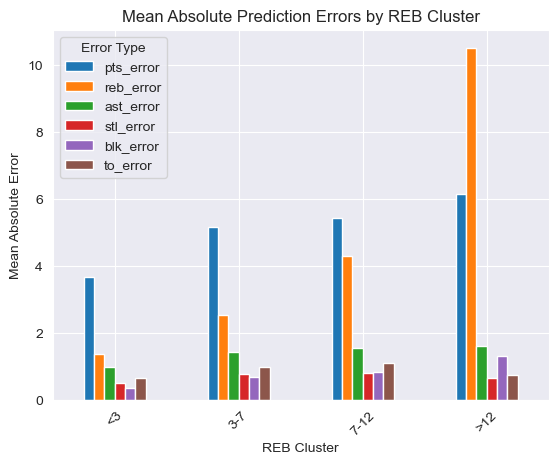

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

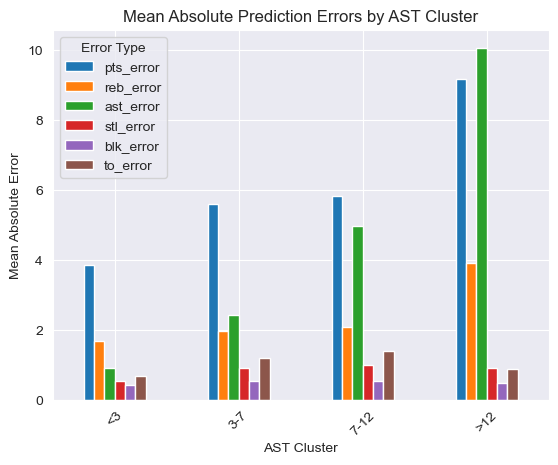

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

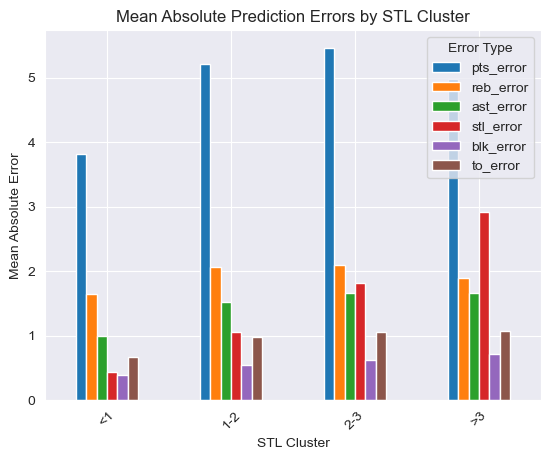

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

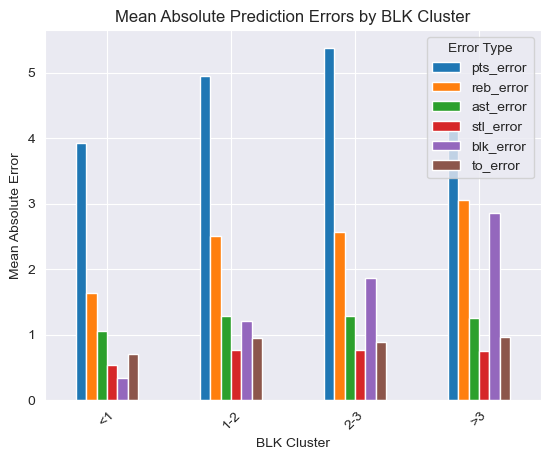

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

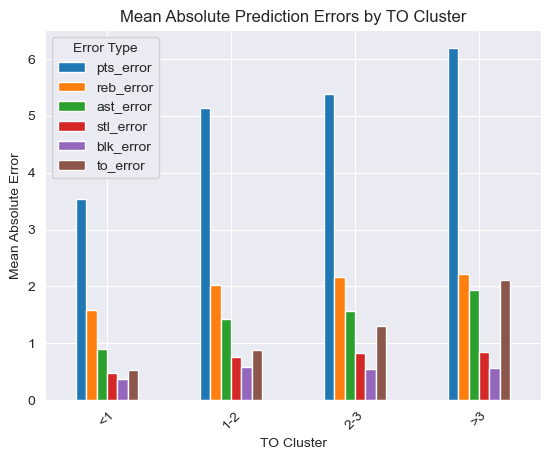

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

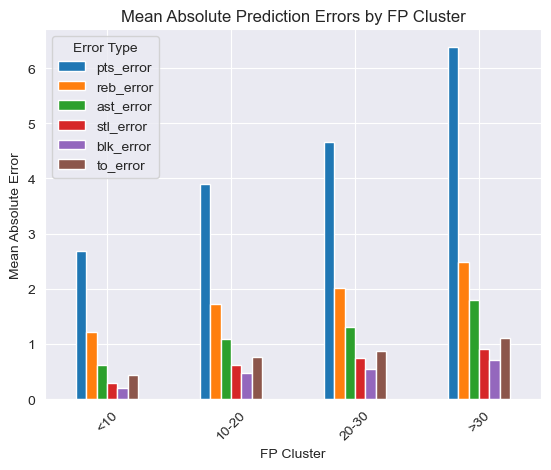

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

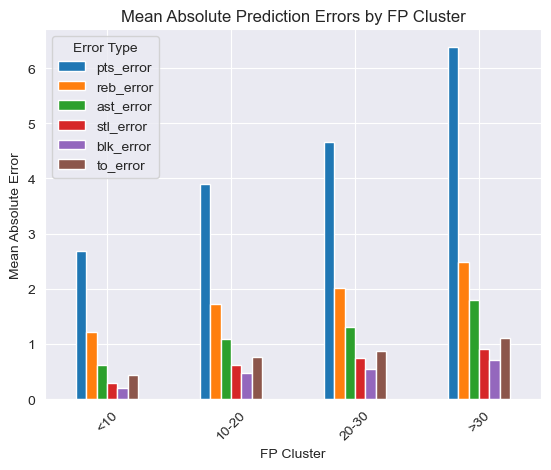

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

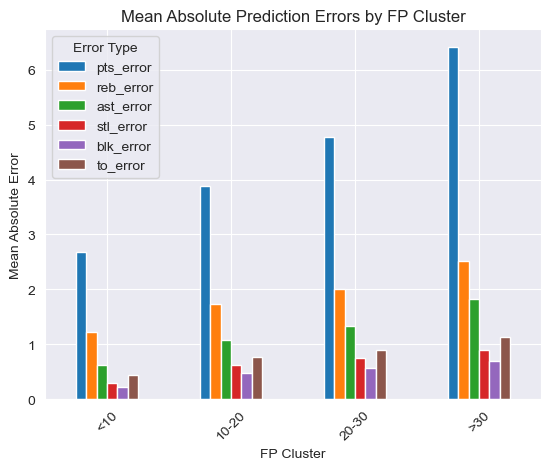

In [24]:
clusters = ['reb_cluster',
'ast_cluster',
'stl_cluster',
'blk_cluster',
'to_cluster',
'fp_fanduel_cluster',
'fp_yahoo_cluster',
'fp_draftkings_cluster',]

for cluster in clusters:
    cluster_name = cluster.split('_')[0].upper()
    cluster_errors = df.groupby(cluster).mean()[[
    'pts_error', 'reb_error', 'ast_error', 'stl_error', 'blk_error', 'to_error',
    'fp_fanduel_error', 'fp_yahoo_error', 'fp_draftkings_error',
    'pts_pct_error', 'reb_pct_error', 'ast_pct_error', 'stl_pct_error', 'blk_pct_error', 'to_pct_error',
    'fp_fanduel_pct_error', 'fp_yahoo_pct_error', 'fp_draftkings_pct_error'
]]
    
    plt.figure(figsize=(14, 8))
    cluster_errors[['pts_error', 'reb_error', 'ast_error', 'stl_error', 'blk_error', 'to_error']].plot(kind='bar')
    plt.title(f'Mean Absolute Prediction Errors by {cluster_name} Cluster')
    plt.xlabel(f'{cluster_name} Cluster')
    plt.ylabel('Mean Absolute Error')
    plt.xticks(rotation=45)
    plt.legend(title='Error Type')
    plt.show()



## Group by cluster